# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
pip install pandas requests lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Estado: 200
Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping
Andorra - Andorra la Vella - 84000
United Arab Emirates - Abu Dhabi - 4975593
Afghanistan - Kabul - 29121286
Antigua and Barbuda - St. John's - 86754
Anguilla - The Valley - 13254
                Country           Capital Population
0               Andorra  Andorra la Vella      84000
1  United Arab Emirates         Abu Dhabi    4975593
2           Afghanistan             Kabul   29121286
3   Antigua and Barbuda        St. John's      86754
4              Anguilla        The Valley      13254
                Country           Capital  Population
0               Andorra  Andorra la Vella       84000
1  United Arab Emirates         Abu Dhabi     4975593
2           Afghanistan             Kabul    29121286
3   Antigua and Barbuda        St. John's       86754
4              Anguilla        The Valley       13254

Datos guardados correctamente en countries.db
(1, 'Andorra',

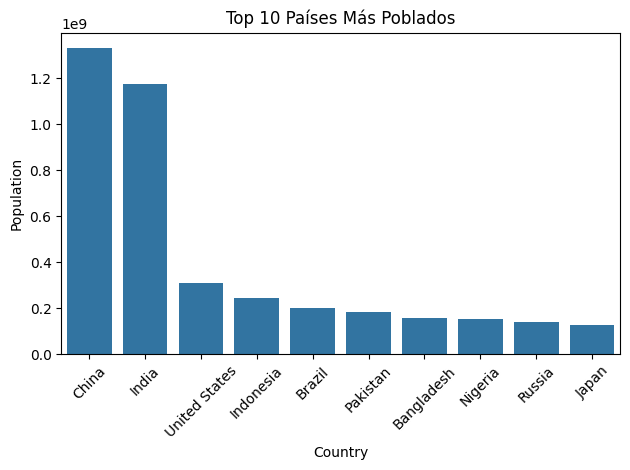

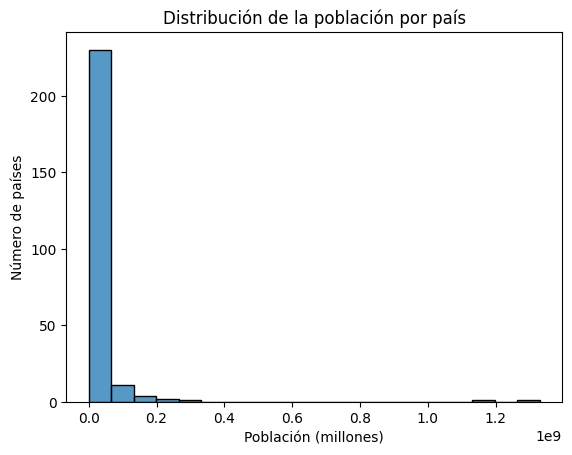

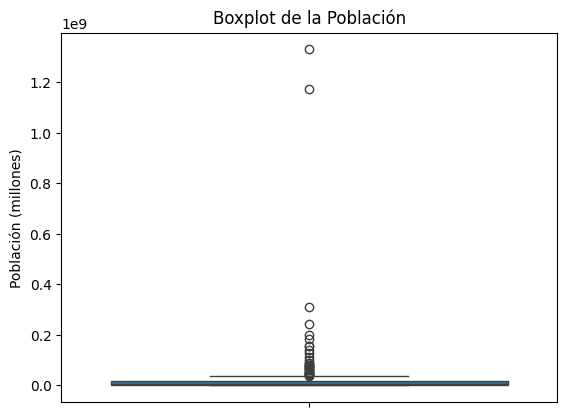

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Obtener el HTML
url = "https://www.scrapethissite.com/pages/simple/"
response = requests.get(url)
# Verificamos la respuesta
print("Estado:", response.status_code)

html = response.text
soup = BeautifulSoup(html, "lxml")
print(soup.title.text)

countries = soup.find_all("div", class_="country")

for country in countries[:5]:
    name = country.find("h3").text.strip()
    capital = country.find("span", class_="country-capital").text.strip()
    population = country.find("span", class_="country-population").text.strip()

    print(name, "-", capital, "-", population)

data = []
for country in countries:
    name = country.find("h3").text.strip()
    capital = country.find("span", class_="country-capital").text.strip()
    population = country.find("span", class_="country-population").text.strip()
    data.append([name, capital, population])
df = pd.DataFrame(data, columns=["Country", "Capital", "Population"])
print(df.head())

df = df.dropna()
df["Country"] = df["Country"].str.strip()
df["Capital"] = df["Capital"].str.strip()
df["Population"] = df["Population"].str.replace(",", "").astype(int)
df = df.reset_index(drop=True)
print(df.head())

conn = sqlite3.connect("countries.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS countries (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT,
    capital TEXT,
    population INTEGER
)
""")

for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO countries (country, capital, population)
        VALUES (?, ?, ?)
    """, (row["Country"], row["Capital"], row["Population"]))

conn.commit()
print("\nDatos guardados correctamente en countries.db")

cursor.execute("SELECT * FROM countries LIMIT 5")
rows = cursor.fetchall()

for row in rows:
    print(row)
    
conn.close()

top10 = df.sort_values(by="Population", ascending=False).head(10)
plt.figure()
sns.barplot(x="Country", y="Population", data=top10)
plt.xticks(rotation=45)
plt.title("Top 10 Países Más Poblados")
plt.tight_layout()
plt.show()

plt.figure()
sns.histplot(df["Population"], bins=20)
plt.xlabel("Población (millones)")
plt.ylabel("Número de países")   # ← nuevo nombre del eje Y
plt.title("Distribución de la población por país")
plt.show()

plt.figure()
sns.boxplot(y=df["Population"])
plt.ylabel("Población (millones)")
plt.title("Boxplot de la Población")
plt.show()